In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Performance Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


<h1>Reading CSV</h1>

In [14]:
# Read from CSV file
df = pd.read_csv('insurance_claims.csv')

<h2>Find Missing Values</h2>
No Missing Values

<h1>Feature Selection / Handling Categorical Variables</h1>

dropped `policy_number` (1000 distinct), `insured_zip` (995 distinct) and `insured_location` (1000 distinct)<br><br>
<i>too many distinct values so drop <br>
   total claim amt |
property claim |
injury claim

In [15]:
# drop _c39 column because its useless
df.drop(columns='_c39',inplace=True)

# drop cause too many distinct values
df.drop(columns=['policy_number', 'insured_zip', 'incident_location'],inplace=True)

In [16]:
# get object columns into list
df_col = list(df.select_dtypes(include=['object']).columns)

# creating instance of labelencoder
labelencoder = LabelEncoder()

# loop through df_col
for col in df_col:
    new_col = col + "_encode"
    # Assigning numerical values and storing in another column
    df[new_col] = labelencoder.fit_transform(df[col])


In [17]:
# drop not encoded columns
df.drop(columns=df_col, inplace=True)
df.shape

(1000, 36)

In [18]:
# drop correlated columns ('injury_claim', 'property_claim', 'vehicle_claim')
# correlation > 0.81 and the 3 cols == total claim
df.drop(columns=['injury_claim', 'property_claim', 'vehicle_claim'], inplace=True)
df.shape

(1000, 33)

In [19]:
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,collision_type_encode,incident_severity_encode,authorities_contacted_encode,incident_state_encode,incident_city_encode,property_damage_encode,police_report_available_encode,auto_make_encode,auto_model_encode,fraud_reported_encode
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,3,0,4,4,1,2,2,10,1,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,1,4,5,5,0,0,8,12,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,2,1,4,1,1,1,1,4,30,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,1,0,4,2,0,0,1,3,34,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,1,2,1,0,1,1,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,1,1,1,0,4,2,0,6,6,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,2,0,1,4,3,2,0,13,28,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,3,1,4,0,0,0,2,11,19,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,2,0,3,1,0,0,2,1,5,0


In [20]:
df_x = df.drop(columns=["fraud_reported_encode"])
df_x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_type_encode,collision_type_encode,incident_severity_encode,authorities_contacted_encode,incident_state_encode,incident_city_encode,property_damage_encode,police_report_available_encode,auto_make_encode,auto_model_encode
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,2,3,0,4,4,1,2,2,10,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,3,0,1,4,5,5,0,0,8,12
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,2,1,4,1,1,1,1,4,30
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,2,1,0,4,2,0,0,1,3,34
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,3,0,1,2,1,0,1,1,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,2,1,1,1,0,4,2,0,6,6
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,2,2,0,1,4,3,2,0,13,28
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,3,1,4,0,0,0,2,11,19
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,2,2,0,3,1,0,0,2,1,5


## Correlation with target var

<AxesSubplot: >

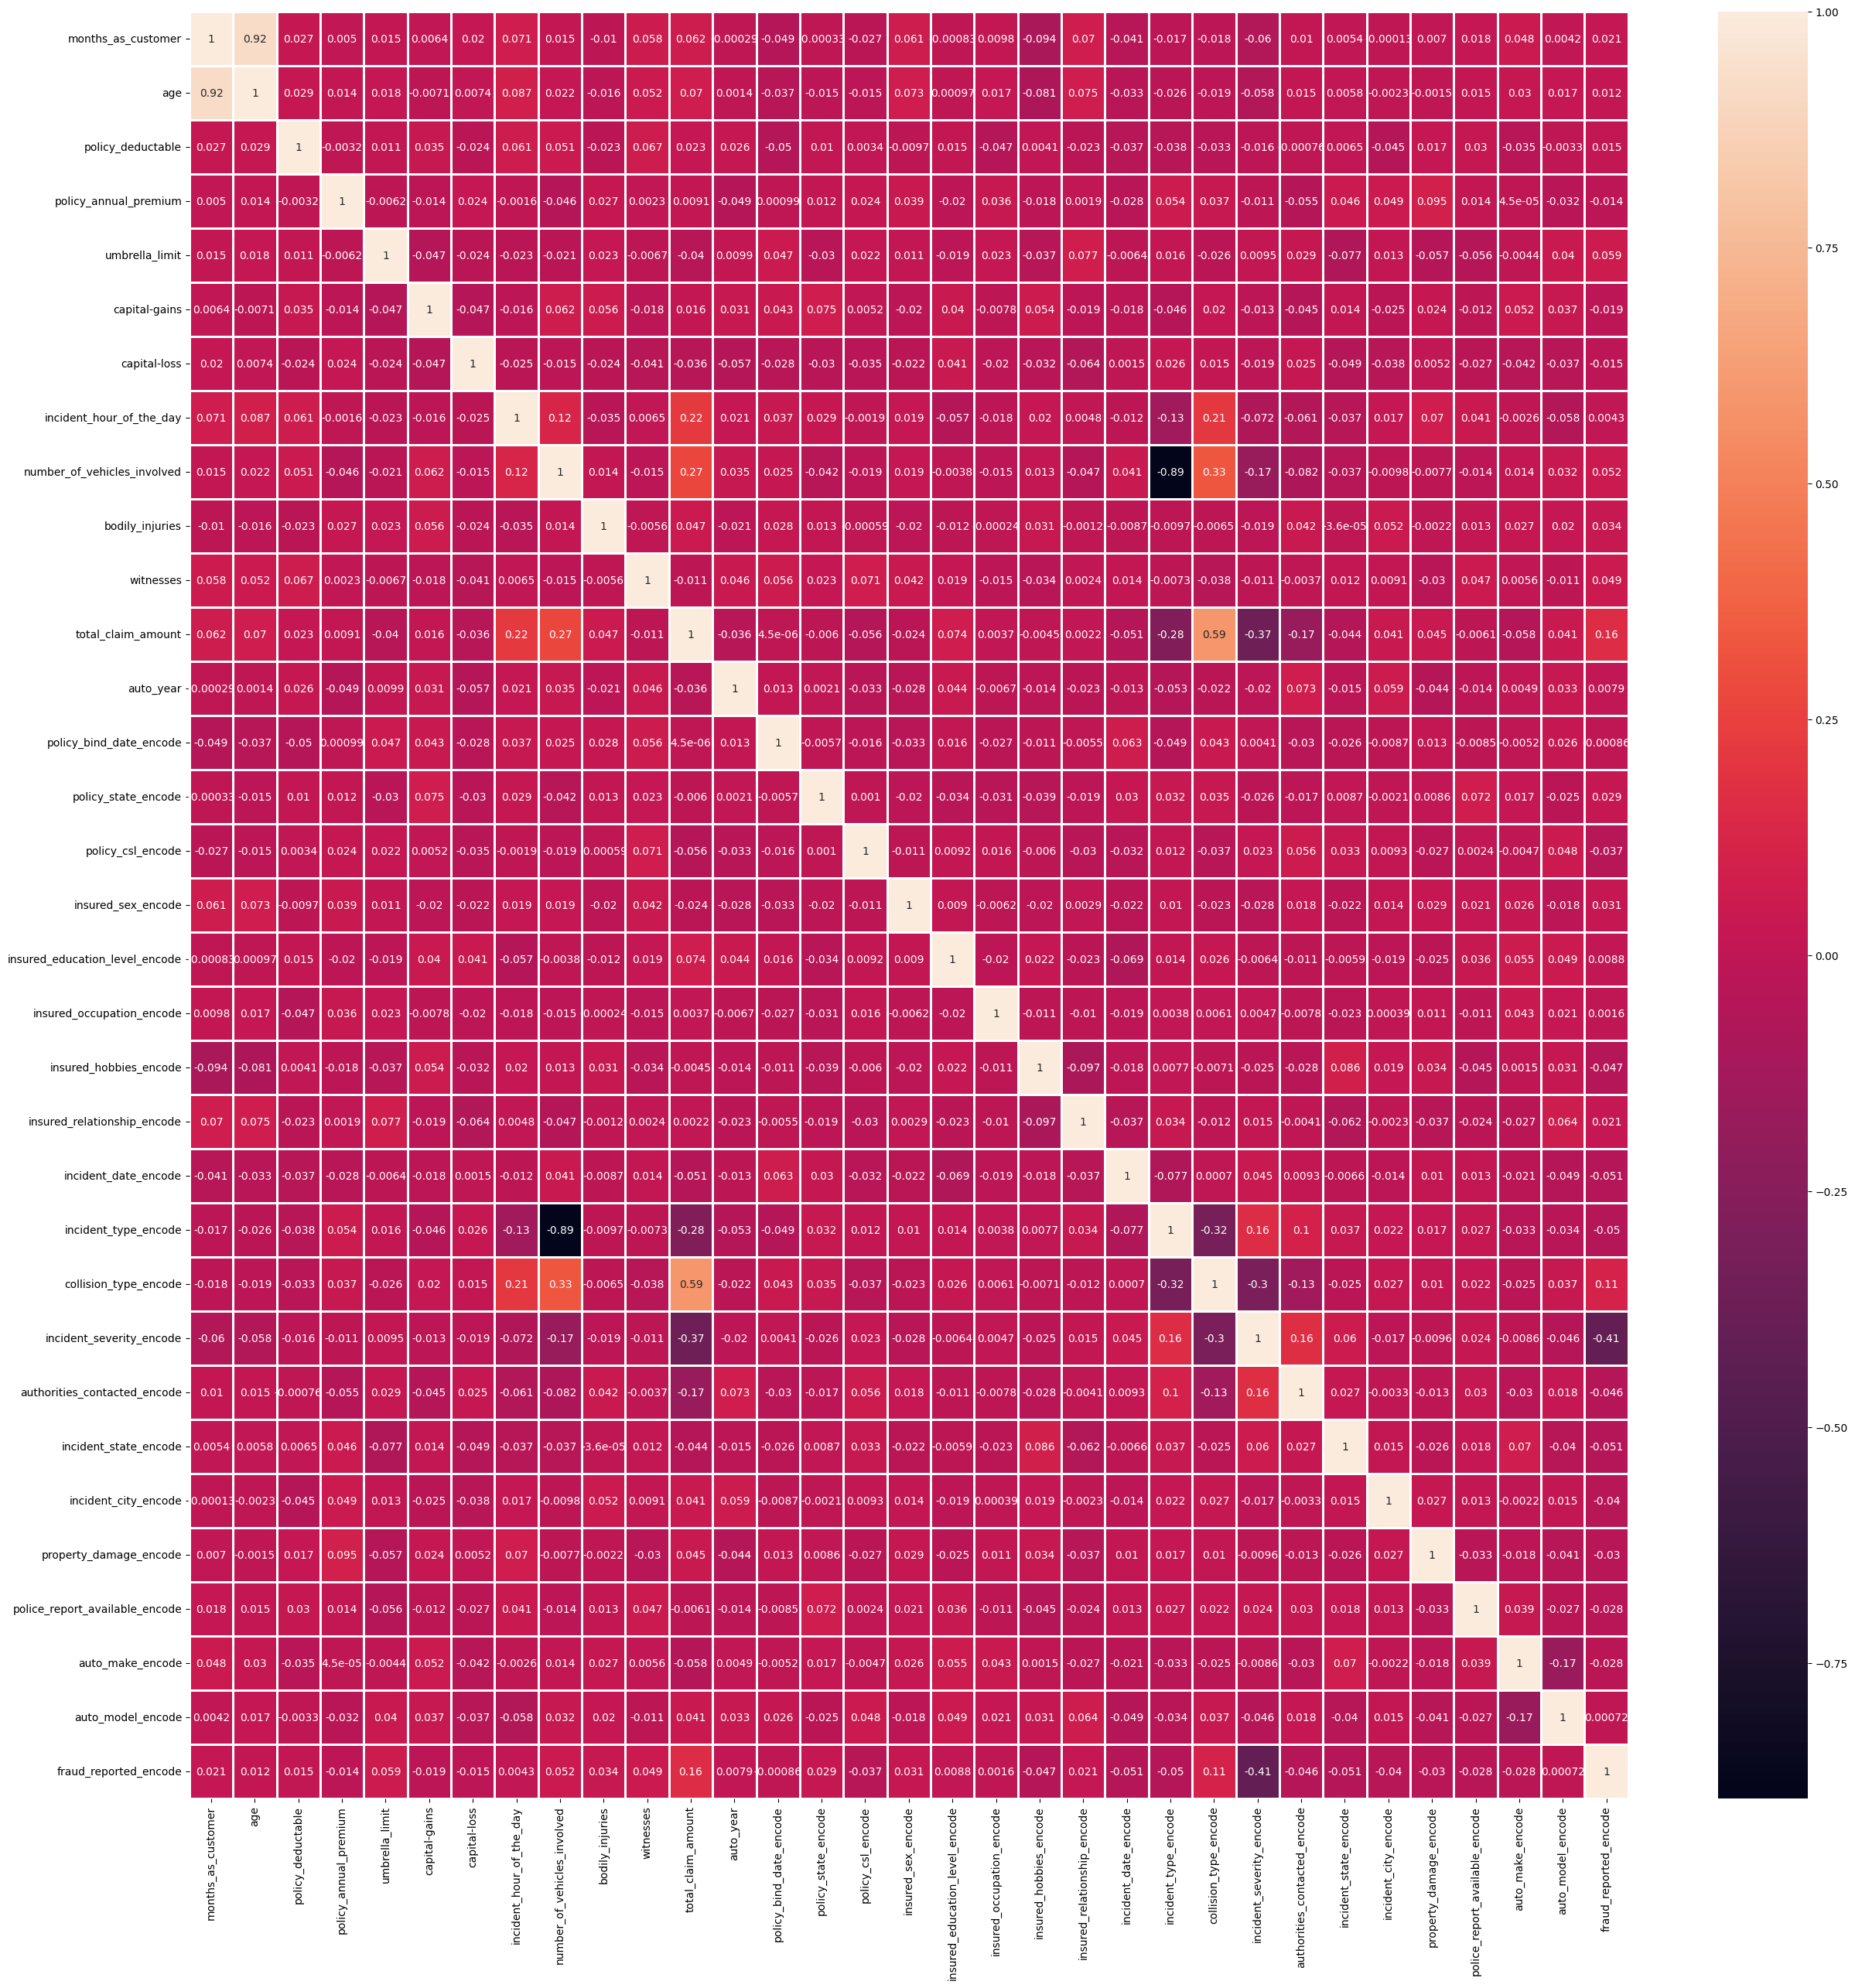

In [21]:
plt.figure(figsize=(30,30))
corr=df.corr()
sns.heatmap(data=corr,annot=True,fmt='.2g',linewidth=1)

In [22]:
X = df[['umbrella_limit', 'number_of_vehicles_involved', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode', 'total_claim_amount']]

## Check for multicollinearity

In [23]:
df2 = df[['umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode']]

col = ['umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode']
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = col
vif["vif_Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif

,features,vif_Factor
0,umbrella_limit,1.226764
1,number_of_vehicles_involved,7.160980
2,total_claim_amount,7.628326
3,incident_date_encode,3.614430
4,incident_type_encode,3.323087
5,collision_type_encode,5.629825
6,incident_severity_encode,2.800091
7,incident_state_encode,3.161188


## Scale

In [24]:
data_to_scale = df[['umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount']]
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_to_scale)
data_scaled
df[['umbrella_limit_scaled', 'number_of_vehicles_involved_scaled', 'total_claim_amount_scaled']] = data_scaled
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_state_encode,incident_city_encode,property_damage_encode,police_report_available_encode,auto_make_encode,auto_model_encode,fraud_reported_encode,umbrella_limit_scaled,number_of_vehicles_involved_scaled,total_claim_amount_scaled
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,4,1,2,2,10,1,1,-0.479476,-0.823865,0.714257
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,5,5,0,0,8,12,1,1.697980,-0.823865,-1.807312
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,1,1,1,1,4,30,0,1.697980,1.140056,-0.686362
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,2,0,0,1,3,34,1,2.133471,-0.823865,0.403135
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1,0,1,1,0,31,0,2.133471,-0.823865,-1.753121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,4,2,0,6,6,0,-0.479476,-0.823865,1.305049
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,4,3,2,0,13,28,0,-0.479476,-0.823865,2.111466
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,2,11,19,0,0.826998,1.140056,0.558507
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,1,0,0,2,1,5,0,1.697980,-0.823865,-0.219110


In [25]:
X = df[['umbrella_limit_scaled', 'number_of_vehicles_involved_scaled', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode', 'total_claim_amount_scaled']]
y = df[['fraud_reported_encode']]


-----
<h2> SMOTE </h2> <i>https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
# define pipeline
# random_state is removed to test the performace of the model, but can be added back after finding the best

over_4060 = SMOTE(sampling_strategy=0.4) 
# oversample the minority class to have 40 percent the number of examples of the majority class

over_5050 = SMOTE() 
# oversample the minority class to have 50 percent the number of examples of the majority class

# !!! Should not be undersampling because of insufficient data points
# under = RandomUnderSampler(sampling_strategy=0.4)
# random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class

# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# transform the dataset

X4060, y4060 = over_4060.fit_resample(X, y)

X5050, y5050 = over_5050.fit_resample(X, y)


------
<h2> Split to training and testing set

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X5050, y5050, test_size=0.2, random_state=42)

# kNN

In [28]:
kNN_model = KNeighborsClassifier(n_neighbors=5) 
kNN_model.fit(x_train,y_train)





C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# kNN-Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
knn_bagging_model = BaggingClassifier(base_estimator = knn, n_estimators=50)

#Fit the training feature Xs and training label Ys
knn_bagging_model.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

# Log Regression

In [32]:
from sklearn.linear_model import LogisticRegression

#Initialize or define the model
logReg = LogisticRegression()

#Fit the training feature Xs and training label Ys
logReg.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Log Regression - AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
adaLR = AdaBoostClassifier(n_estimators=50, learning_rate=0.1,base_estimator=logReg, random_state=42)
adaLR.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.1,
                   random_state=42)

# Log Regression - Bagging

In [36]:
bagLR = BaggingClassifier(n_estimators=50, base_estimator=logReg, random_state=42)
bagLR.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50,
                  random_state=42)

# Decision Tree

In [38]:
deTree = DecisionTreeClassifier()
deTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
deTree_bagging = BaggingClassifier(base_estimator = deTree, n_estimators=50)
deTree_bagging.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)

In [40]:
deTree_adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=0.1,base_estimator=deTree, random_state=42)
deTree_adaboost.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   random_state=42)

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Temp\ipykernel_29008\3758756570.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

## Neural network

In [49]:
import os
import random

In [80]:
os.environ['PYTHONHASHSEED']=str(42)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
# create model
neuralNetwork_model = Sequential()
neuralNetwork_model.add(Dense(6, input_dim=x_train.shape[1], activation='relu'))
neuralNetwork_model.add(Dense(3, activation='relu'))
neuralNetwork_model.add(Dense(1, activation='sigmoid'))
# compile model
neuralNetwork_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

neuralNetwork_model.fit(x_train, y_train, epochs=10, batch_size=80, verbose=0, validation_data=(x_test, y_test))

## Naive Bayes

In [56]:
#Initialize or define the model
nb_model = GaussianNB()

#Fit the training feature Xs and training label Ys
nb_model.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## NB w Bagging

In [58]:
nb_bagging = BaggingClassifier(estimator=nb_model, random_state=42, n_estimators=50)
nb_bagging.fit(x_train, y_train)


C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42)

## NB w Boosting

In [59]:
nb_boost = AdaBoostClassifier(estimator=nb_model, random_state=42)
nb_boost.fit(x_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=GaussianNB(), random_state=42)

# AUROC

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [77]:
# predict probabilities
pred_prob_knn = kNN_model.predict_proba(x_test)
pred_prob_knn_bagging = knn_bagging_model.predict_proba(x_test)
pred_prob_logReg = logReg.predict_proba(x_test)
pred_prob_logRegBagging = bagLR.predict_proba(x_test)
pred_prob_logRegAdaBoost = adaLR.predict_proba(x_test)
pred_prob_DeTree = deTree.predict_proba(x_test)
pred_prob_DeTreeBagging = deTree_bagging.predict_proba(x_test)
pred_prob_DeTreeBoosting = deTree_adaboost.predict_proba(x_test)
pred_prob_RandomForest = rf.predict_proba(x_test)

pred_prob_NB = nb_model.predict_proba(x_test)
pred_prob_NBwBag = nb_bagging.predict_proba(x_test)
pred_prob_NBwBoost = nb_boost.predict_proba(x_test)

pred_prob_NeuralNetwork = neuralNetwork_model.predict(x_test).ravel()

10/10 [==============================] - 0s 667us/step


In [78]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_knn_bagging[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_logReg[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_logRegBagging[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_logRegAdaBoost[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_DeTree[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob_DeTreeBagging[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob_DeTreeBoosting[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob_RandomForest[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test, pred_prob_NB[:,1], pos_label=1)
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_prob_NBwBag[:,1], pos_label=1)
fpr12, tpr12, thresh12 = roc_curve(y_test, pred_prob_NBwBoost[:,1], pos_label=1)

fpr13, tpr13, thresh12 = roc_curve(y_test, pred_prob_NeuralNetwork, pos_label=1)

In [88]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_knn[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob_knn_bagging[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob_logReg[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob_logRegBagging[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob_logRegAdaBoost[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob_DeTree[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob_DeTreeBagging[:,1])
auc_score8 = roc_auc_score(y_test, pred_prob_DeTreeBoosting[:,1])
auc_score9 = roc_auc_score(y_test, pred_prob_RandomForest[:,1])
auc_score10 = roc_auc_score(y_test, pred_prob_NB[:,1])
auc_score11 = roc_auc_score(y_test, pred_prob_NBwBag[:,1])
auc_score12 = roc_auc_score(y_test, pred_prob_NBwBoost[:,1])
auc_score13 =  auc(fpr13, tpr13) #NN

print("knn", auc_score1)
print("knn w bagging", auc_score2)
print("log reg", auc_score3)
print("log reg w bagging", auc_score4)
print("log reg w boosting", auc_score5)
print("decision tree", auc_score6)
print("decision tree w bagging", auc_score7)
print("decision tree w boosting", auc_score8)
print("random forest", auc_score9)
print("nb", auc_score10)
print("nb w bagging", auc_score11)
print("nb w boosting", auc_score12)
print("neural network", auc_score13)


knn 0.8027728873239436
knn w bagging 0.8173195422535212
log reg 0.847843309859155
log reg w bagging 0.8476232394366199
log reg w boosting 0.8378961267605635
decision tree 0.7384242957746479
decision tree w bagging 0.8840669014084506
decision tree w boosting 0.7388204225352113
random forest 0.8878521126760563
nb 0.8099031690140845
nb w bagging 0.8096830985915493
nb w boosting 0.6288292253521126
neural network 0.6416813380281691


In [67]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

C:\Users\andre\AppData\Local\Temp\ipykernel_29008\2614774922.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


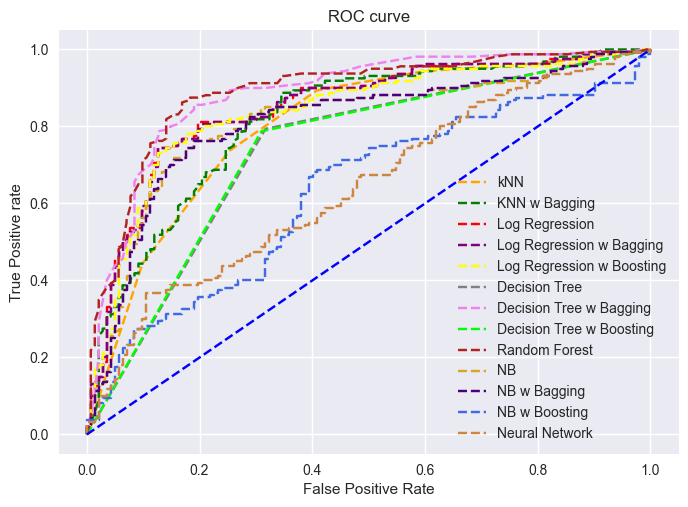

In [79]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='kNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN w Bagging')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Log Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Log Regression w Bagging')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Log Regression w Boosting')
plt.plot(fpr6, tpr6, linestyle='--',color='grey', label='Decision Tree')
plt.plot(fpr7, tpr7, linestyle='--',color='violet', label='Decision Tree w Bagging')
plt.plot(fpr8, tpr8, linestyle='--',color='lime', label='Decision Tree w Boosting')
plt.plot(fpr9, tpr9, linestyle='--',color='firebrick', label='Random Forest')
plt.plot(fpr10, tpr10, linestyle='--',color='goldenrod', label='NB')
plt.plot(fpr11, tpr11, linestyle='--',color='indigo', label='NB w Bagging')
plt.plot(fpr12, tpr12, linestyle='--',color='royalblue', label='NB w Boosting')
plt.plot(fpr13, tpr13, linestyle='--',color='peru', label='Neural Network')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

## Ref

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5